In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
df = pd.read_csv('Datos_Fermentacion.csv', delimiter=';')
df

#df = pd.read_csv('datasteven.csv', delimiter=';')
#df

,TEMPERATURA,CO2,HUMEDAD,CALIDAD
0,25.25,503.42,34.02,Buena Calidad
1,25.25,508.31,34.02,Buena Calidad
2,25.00,503.42,34.12,Buena Calidad
3,24.75,503.42,33.92,Baja Calidad
4,25.00,508.31,34.12,Buena Calidad
...,...,...,...,...
1980,24.00,454.55,34.02,Baja Calidad
1981,23.75,459.43,34.02,Baja Calidad
1982,24.25,454.55,33.92,Baja Calidad
1983,24.00,449.66,34.02,Baja Calidad


MODELO DE REGRESIÓN LINEAL *MÚLTIPLE*

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

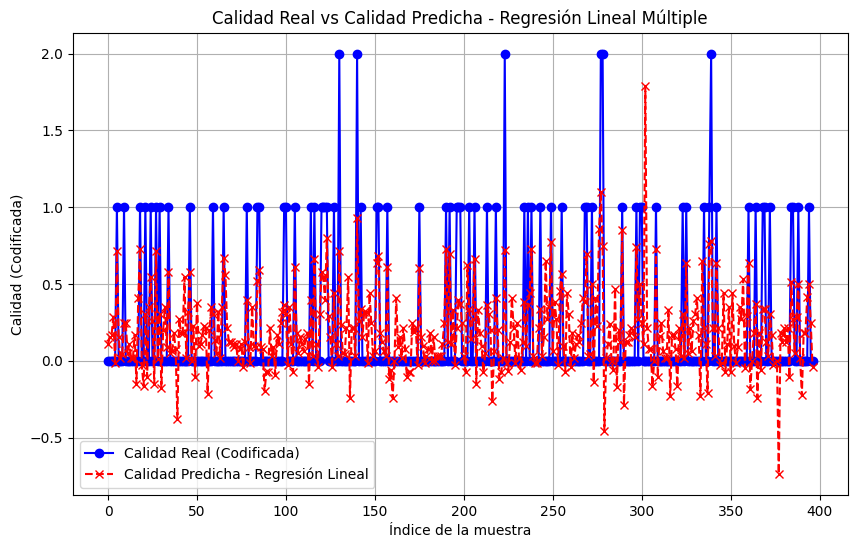

Mapeo de categorías:
0: Baja Calidad
1: Buena Calidad
2: Sobrefermentada


In [ ]:
# Cargar los datos desde un archivo CSV
df = pd.read_csv('Datos_Fermentacion.csv', delimiter=';')

# Procesamiento de datos
# Seleccionar características (X) y variable objetivo (y)
X = df[['TEMPERATURA', 'CO2', 'HUMEDAD']]  # Características
y = df['CALIDAD']  # Variable objetivo (asegúrate de que esta columna existe)

# Codificar la variable categórica 'CALIDAD' a valores numéricos
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Modelo de regresión lineal múltiple
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)  # Entrenamiento del modelo
lin_predictions = lin_reg.predict(X_test)  # Predicciones

# Visualización de resultados
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Calidad Real (Codificada)", marker='o', linestyle='-', color='blue')
plt.plot(lin_predictions, label="Calidad Predicha - Regresión Lineal", marker='x', linestyle='--', color='red')
plt.title("Calidad Real vs Calidad Predicha - Regresión Lineal Múltiple")
plt.xlabel("Índice de la muestra")
plt.ylabel("Calidad (Codificada)")
plt.legend()
plt.grid(True)
plt.show()

# Mapeo de las categorías originales para interpretación
print("Mapeo de categorías:")
for i, category in enumerate(label_encoder.classes_):
    print(f"{i}: {category}")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

# Cargar los datos desde un archivo CSV
df = pd.read_csv('Datos_Fermentacion.csv', delimiter=';')

# Procesamiento de datos
X = df[['TEMPERATURA', 'CO2', 'HUMEDAD']]  # Variables independientes
y = df['CALIDAD']  # Variable dependiente

# Codificar la variable categórica 'CALIDAD' a valores numéricos
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Modelo de regresión lineal múltiple
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)  # Entrenamiento del modelo
lin_predictions = lin_reg.predict(X_test)  # Predicciones

# Calcular el porcentaje de predicción (R^2 score)
r2 = r2_score(y_test, lin_predictions) * 100
print(f"R^2 Score (%): {r2:.2f}")

# Decodificar las predicciones (opcional, para interpretar resultados)
predictions_clipped = np.clip(np.round(lin_predictions).astype(int), 0, len(label_encoder.classes_) - 1)
y_test_decoded = label_encoder.inverse_transform(y_test)
lin_predictions_decoded = label_encoder.inverse_transform(predictions_clipped)

# Mostrar resultados decodificados
print("Resultados Decodificados:")
for i in range(len(y_test_decoded)):
    print(f"Real: {y_test_decoded[i]}, Predicción: {lin_predictions_decoded[i]}")


R^2 Score (%): 40.38
Resultados Decodificados:
Real: Baja Calidad, Predicción: Baja Calidad
Real: Baja Calidad, Predicción: Baja Calidad
Real: Baja Calidad, Predicción: Baja Calidad
Real: Baja Calidad, Predicción: Baja Calidad
Real: Baja Calidad, Predicción: Baja Calidad
Real: Buena Calidad, Predicción: Buena Calidad
Real: Baja Calidad, Predicción: Baja Calidad
Real: Baja Calidad, Predicción: Baja Calidad
Real: Baja Calidad, Predicción: Baja Calidad
Real: Buena Calidad, Predicción: Baja Calidad
Real: Baja Calidad, Predicción: Baja Calidad
Real: Baja Calidad, Predicción: Baja Calidad
Real: Baja Calidad, Predicción: Baja Calidad
Real: Baja Calidad, Predicción: Baja Calidad
Real: Baja Calidad, Predicción: Baja Calidad
Real: Baja Calidad, Predicción: Baja Calidad
Real: Baja Calidad, Predicción: Baja Calidad
Real: Baja Calidad, Predicción: Baja Calidad
Real: Buena Calidad, Predicción: Buena Calidad
Real: Baja Calidad, Predicción: Baja Calidad
Real: Baja Calidad, Predicción: Baja Calidad
Rea

MODELO DE LSTM

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.7731
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.6864
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.6622
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4602
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3966
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3516
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3228
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2762
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2411
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2242
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1588
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1409
Epoch 13/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1154
Epoch 14/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1094
Epoch 15/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0994
Epoch 16/50
50/50 

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


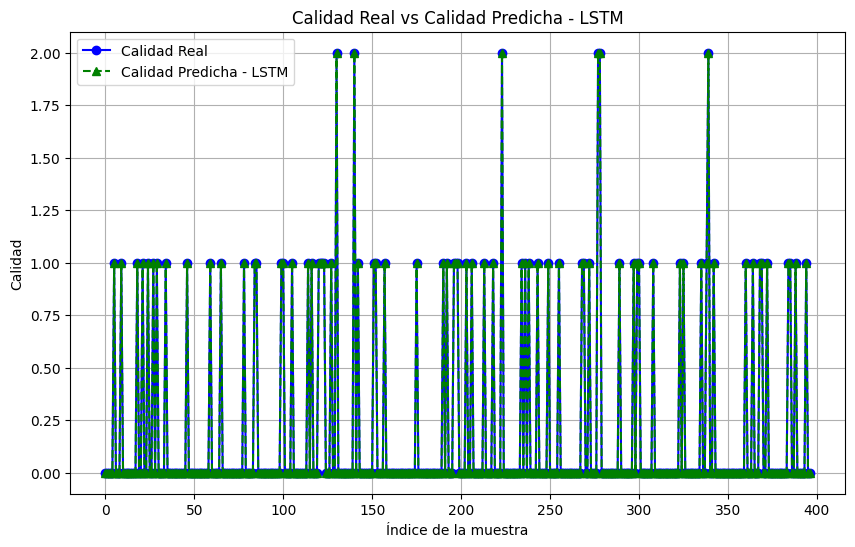

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Cargar los datos desde un archivo CSV
df = pd.read_csv('Datos_Fermentacion.csv', delimiter=';')

# Procesamiento de datos
X = df[['TEMPERATURA', 'CO2', 'HUMEDAD']]  # Variables independientes
y = df['CALIDAD']  # Variable dependiente

# Codificar la variable categórica 'CALIDAD' a valores numéricos
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convierte 'Baja Calidad', etc. en números

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

### Preprocesamiento para LSTM ###
# Escalar las características para mejorar el entrenamiento
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Dar formato 3D a las entradas para LSTM
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Escalar `y` para LSTM (opcional, pero ayuda si es numérico continuo)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

### Crear y entrenar el modelo LSTM ###
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamiento del modelo
model.fit(X_train_lstm, y_train_scaled, epochs=50, batch_size=32, verbose=1)

### Predicciones con el modelo LSTM ###
lstm_predictions_scaled = model.predict(X_test_lstm)
lstm_predictions = scaler_y.inverse_transform(lstm_predictions_scaled)  # Invertir escala para comparación

# Decodificar las predicciones (si `y` es categórico)
lstm_predictions_clipped = np.clip(np.round(lstm_predictions).astype(int), 0, len(label_encoder.classes_) - 1)
y_test_decoded = label_encoder.inverse_transform(y_test)
lstm_predictions_decoded = label_encoder.inverse_transform(lstm_predictions_clipped)

### Visualización de resultados ###
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Calidad Real", marker='o', linestyle='-', color='blue')
plt.plot(lstm_predictions_clipped, label="Calidad Predicha - LSTM", marker='^', linestyle='--', color='green')
plt.title("Calidad Real vs Calidad Predicha - LSTM")
plt.xlabel("Índice de la muestra")
plt.ylabel("Calidad")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import r2_score
import numpy as np
# Calcular el porcentaje de predicción (R² score) para el modelo LSTM
lstm_r2 = r2_score(y_test, lstm_predictions) * 100
lstm_r2


98.9702582359314

MODELO CLUSTERING

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

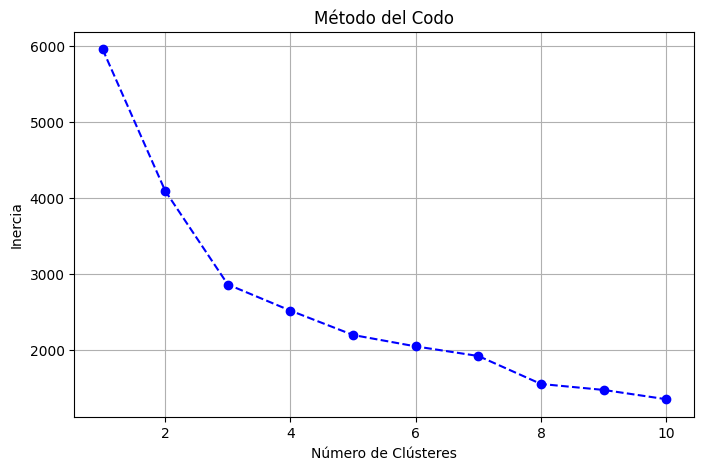

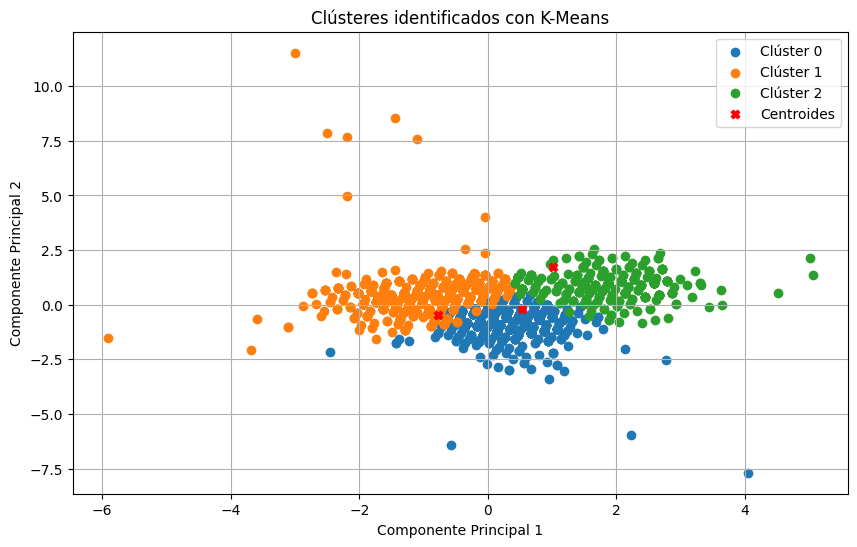

Número de muestras en cada clúster:
Cluster
1    926
0    727
2    332
Name: count, dtype: int64

Promedios de las características por clúster:
         TEMPERATURA         CO2    HUMEDAD
Cluster                                    
0          24.590440  465.504979  33.777043
1          24.131749  461.286533  33.992905
2          24.759036  497.708524  34.002620


In [ ]:


# Cargar los datos desde un archivo CSV
df = pd.read_csv('Datos_Fermentacion.csv', delimiter=';')

# Seleccionar características relevantes para el clustering
X = df[['TEMPERATURA', 'CO2', 'HUMEDAD']]

# Estandarización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encontrar el número óptimo de clústeres utilizando el método del codo
inertia = []
range_n_clusters = range(1, 11)  # Probar entre 1 y 10 clústeres
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o', linestyle='--', color='b')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

# Elegir el número óptimo de clústeres (por ejemplo, 3)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# Asignar las etiquetas de los clústeres a los datos originales
df['Cluster'] = kmeans.labels_

# Reducir dimensiones con PCA para visualización en 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Graficar los clústeres
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    plt.scatter(
        X_pca[df['Cluster'] == cluster, 0],
        X_pca[df['Cluster'] == cluster, 1],
        label=f'Clúster {cluster}'
    )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', label='Centroides')
plt.title('Clústeres identificados con K-Means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()

# Análisis de clústeres
print("Número de muestras en cada clúster:")
print(df['Cluster'].value_counts())

print("\nPromedios de las características por clúster:")
cluster_summary = df.groupby('Cluster')[['TEMPERATURA', 'CO2', 'HUMEDAD']].mean()
print(cluster_summary)


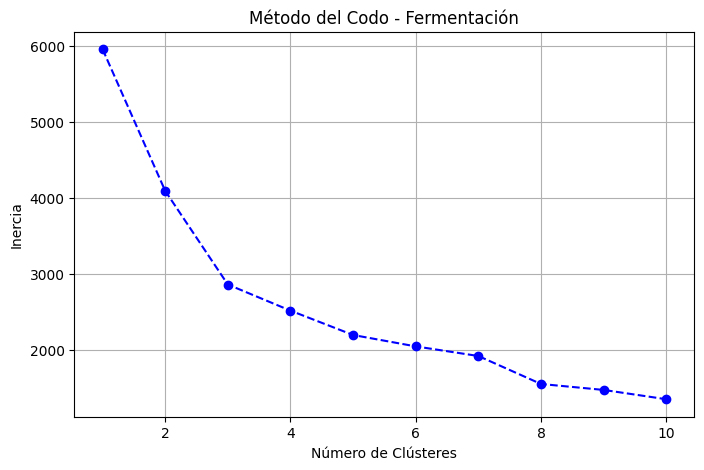

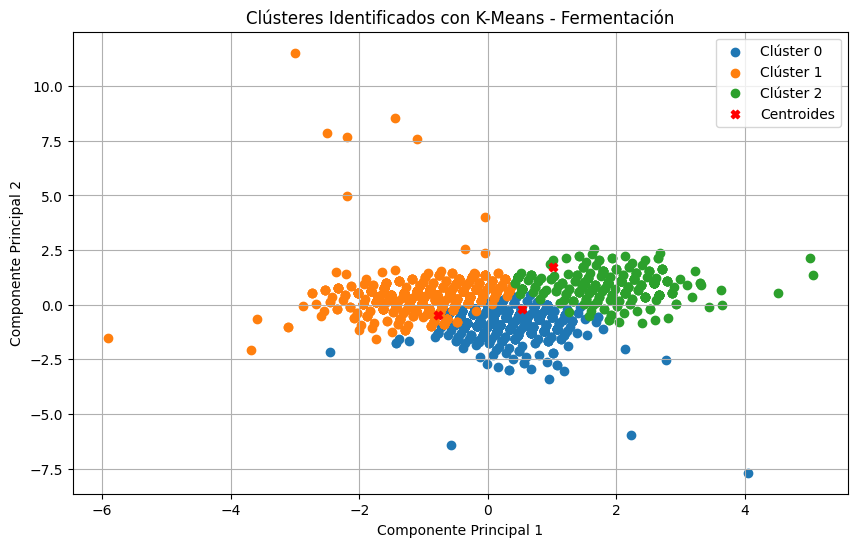

Número de muestras en cada clúster:
Cluster
1    926
0    727
2    332
Name: count, dtype: int64

Promedios de las características por clúster:
         TEMPERATURA         CO2    HUMEDAD
Cluster                                    
0          24.590440  465.504979  33.777043
1          24.131749  461.286533  33.992905
2          24.759036  497.708524  34.002620


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Cargar los datos desde un archivo CSV
df = pd.read_csv('Datos_Fermentacion.csv', delimiter=';')

# Seleccionar características relevantes para el clustering
X = df[['TEMPERATURA', 'CO2', 'HUMEDAD']]

# Estandarización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encontrar el número óptimo de clústeres utilizando el método del codo
inertia = []
range_n_clusters = range(1, 11)  # Probar entre 1 y 10 clústeres
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o', linestyle='--', color='b')
plt.title('Método del Codo - Fermentación')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

# Elegir el número óptimo de clústeres (por ejemplo, 3)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# Asignar las etiquetas de los clústeres a los datos originales
df['Cluster'] = kmeans.labels_

# Reducir dimensiones con PCA para visualización en 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Graficar los clústeres
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    plt.scatter(
        X_pca[df['Cluster'] == cluster, 0],
        X_pca[df['Cluster'] == cluster, 1],
        label=f'Clúster {cluster}'
    )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', label='Centroides')
plt.title('Clústeres Identificados con K-Means - Fermentación')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()

# Análisis de clústeres
print("Número de muestras en cada clúster:")
print(df['Cluster'].value_counts())

print("\nPromedios de las características por clúster:")
cluster_summary = df.groupby('Cluster')[['TEMPERATURA', 'CO2', 'HUMEDAD']].mean()
print(cluster_summary)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Cargar datos (simulados)
data = pd.DataFrame({
    'Temperatura': [22.5, 23.0, 23.5, 24.0, 24.5],
    'Humedad': [60, 62, 65, 68, 70],
    'CO2': [400, 420, 430, 450, 460],
    'pH': [5.8, 5.6, 5.4, 5.2, 5.1]
})

X = data[['Temperatura', 'Humedad', 'CO2']]
y = data['pH']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Regresión Lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)
print("Error Cuadrático Medio:", mean_squared_error(y_test, y_pred))

# Coeficientes
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)


Error Cuadrático Medio: 0.0024767674675043776
Coeficientes: [ 0.00046574 -0.00023287 -0.01164338]
Intercepto: 10.44417831004657


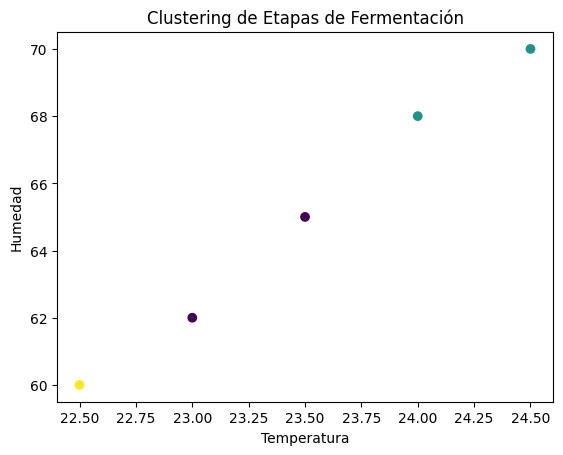

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Datos de entrada
data = pd.DataFrame({
    'Temperatura': [22.5, 23.0, 23.5, 24.0, 24.5],
    'Humedad': [60, 62, 65, 68, 70]
})

# Modelo de K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data)

# Visualización de Clusters
plt.scatter(data['Temperatura'], data['Humedad'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Temperatura')
plt.ylabel('Humedad')
plt.title('Clustering de Etapas de Fermentación')
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Datos simulados (serie temporal de CO2)
data = np.array([400, 410, 420, 430, 440, 450, 460, 470, 480, 490])
scaler = MinMaxScaler()
data = scaler.fit_transform(data.reshape(-1, 1))

# Preparar datos para LSTM
def create_dataset(data, time_steps=3):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 3
X, y = create_dataset(data, time_steps)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Construir el modelo LSTM
model = Sequential([
    LSTM(50, activation='relu', input_shape=(time_steps, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
model.fit(X, y, epochs=50, verbose=0)

# Predicción
predicted = model.predict(X)
print("Predicción Escalada:", predicted.flatten())


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
Predicción Escalada: [0.14038697 0.16382632 0.18757296 0.21190228 0.23653331 0.26177648
 0.28774947]
